<a href="https://colab.research.google.com/github/hawkilol/k-means-clustering-airports/blob/main/IA_K_means02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

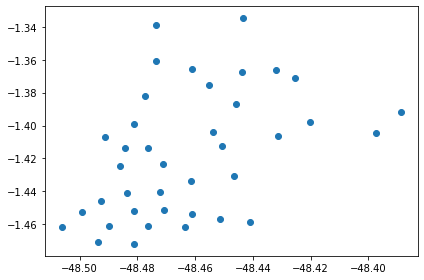

In [ ]:
# Fonte da base de dados: https://mapacep.com.br/index.php
# Link da base de dados no gist
url = 'https://gist.githubusercontent.com/hawkilol/9a5e64f50372346a35bb5098c59c7380/raw/7cdb42466b91704e474b9e7737ff22a7fd46e833/bairrosBelemNovo.csv'
df = pd.read_csv(url, usecols= ['Latitude','Longitude'])
dfBairros = pd.read_csv(url)
plt.scatter(df.Longitude, df.Latitude)
plt.show()


In [ ]:
# Base de dados com os nomes dos bairros de belem com seus respectivos latitude(eixo Y) e longitude(eixo X)
dfBairros
#df

,Bairro,Latitude,Longitude
0,Val-de-Cães,-1.382062,-48.477523
1,Aurá,-1.404338,-48.397321
2,Águas Lindas,-1.391703,-48.388838
3,Barreiro,-1.413749,-48.484351
4,Batista Campos,-1.461139,-48.489843
5,Bengui,-1.375259,-48.455282
6,Cabanagem,-1.366319,-48.432151
7,Campina,-1.452380,-48.499294
8,Canudos,-1.453612,-48.461236
9,Castanheira,-1.406292,-48.431451


In [ ]:
# Retorna as coordenas de um item do dict a partir de um indice
def coords(data, index):
  x = data.loc[index, 'Latitude']
  y = data.loc[index, 'Longitude']
  return x, y


In [ ]:
# Distancia euclidiana
def eucDist(xa,xb,ya,yb):
  dist = np.sqrt((float(xa)-float(xb))**2 + (float(ya)-float(yb))**2)
  return dist

In [ ]:
# #mean = centroid
# def UpdateMean(n, mean, item):
#   for i in range(len(mean)):
#     m = mean[i]
#     #calcula a media de cada agrupamento para determinar o seu centroide
#     m = (m*(n-1)+item[i])/float(n)
#     mean[i] = round(m, 3)
#   return mean

In [ ]:
# Soma das distancias euclidianas entre as amostras e os centroides
def totalDist(centroids, tamanho_amostras, df, classes):
  dist = 0
  for f, coords_cent in centroids.items():
    x_centroid, y_centroid = coords_cent
    for amostra in range(tamanho_amostras):
      x_amostra, y_amostra = coords(df, amostra)
      dist += eucDist(x_amostra, x_centroid, y_amostra, y_centroid)
  return dist 

In [ ]:
def kMeans(K, df):
  # Numero total de amostras é o shape da base de dados
  nTotal_amostras = df.shape[0]

  #inicializa o dicionario inicial de centroides

  # Primeiro centroide(Val-de-Cans, 0)
  centroids = {0: coords(df, 0)}
  #K = 4
  for i in range(1, K):
    rand_amostra = np.random.randint(nTotal_amostras)
    centroids[i] =  coords(df, int(rand_amostra))
  
 

  # diferencia os centroids de forma aleatoria
  for i in range(K):
    for j in range(K):
      if i != j and j != 0:
        if centroids[i] == centroids[j]:
          rand_amostra = np.random.randint(nTotal_amostras)
          centroids[j] =  coords(df, int(rand_amostra))
          #centroids[len(centroids)] =  coords(df, int(rand_amostra))
          
 

   
  #classifica as amostras
  #inicializa as classes de acordo com número de means k 
  classes = {j: [] for j in range(K)}
  
  for i in range(nTotal_amostras*10):
    for n_amostra in range(nTotal_amostras):
      #reseta as distancias
      dists = []
      
      for f, coords_centroid in centroids.items():
        #escolhe os centroids com a menor distancia em relação as amostras
        x_centroid, y_centroid = coords_centroid
        x_amostra, y_amostra = coords(df, n_amostra)
        dists.append(eucDist(x_amostra, x_centroid, y_amostra, y_centroid))
        n_centroid = dists.index(min(dists))

     
        classes[n_centroid].append(n_amostra)

        
        
  #atualiza os centroids com base na classificação
  
    for classe in classes:
      #pula a atualização de centroid para o k do aeroporto de val de cans 0(colocado primeiro no dict centroids)
      if classe != 0:
        xs, ys = coords(df, classes[classe])
        
        x = np.average(xs)
        y = np.average(ys)
        centroids[classe] = (x, y)
        #UpdateMean()

  #print("Centroides:", centroids)
  #print("Amostras Classificadas:", classes)
  total_dist = totalDist(centroids, nTotal_amostras, df, classes)
  #print("Distancia Total:", total_dist)

  longitudes = [] # x
  latitudes = [] # y
  



  return classes, centroids, total_dist
      

    



In [ ]:
classes, centroids, total_dist = kMeans(4, df)

In [ ]:
list_dists = []
list_centroid = []
list_classes = []
table = []
data = []
for i in range(20):
  classes, centroid, total_dist = kMeans(4, df)

  list_dists.append(total_dist)
  list_centroid.append(centroid)
  list_classes.append(classes)
  data = [total_dist, centroid]
  table.append(data)





In [ ]:
# melhor distancia
print(list_dists)
best_dist = min(list_dists)
print("Melhor distancia:", best_dist)

# escolhe os centroids da melhor clusterização para a plotagem 
best_run = list_dists.index(best_dist)
print("Numero da Melhor Clusterização:", best_run)
print("c", centroid)
print("cl", classes)
centroids = list_centroid[best_run]
classes = list_classes[best_run]

print("c", centroids)
print("cl", classes)

# escolhe os centroid da pior clusterização
worst_dist = max(list_dists)
print("Pior distancia:", worst_dist)
worst_run = list_dists.index(worst_dist)
print("Numero da pior Clusterização:", worst_run)

dataf = pd.DataFrame(table, columns = ["Distancia Total,", "Centroides"])
print(dataf)
datafTable = dataf.to_csv('bairros.csv')
dfData = pd.read_csv('bairros.csv')


[8.413850162685787, 8.044770135990532, 8.4085686062638, 8.815926946567698, 8.672072377779916, 8.639193409279665, 8.523363419740306, 8.131908883026032, 8.699186004751796, 7.674728108328929, 8.235412186697896, 8.337637296583026, 8.464845025330137, 8.100148123267564, 8.444327009226821, 8.121975698455474, 8.317816857666394, 7.775106509480217, 8.182533313824212, 8.32371110232556]
Melhor distancia: 7.674728108328929
Numero da Melhor Clusterização: 9
c {0: (-1.3820615, -48.4775227), 1: (-1.4433118578702573, -48.47503431777236), 2: (-1.3859709604988102, -48.43018337813613), 3: (-1.4601750350778593, -48.47672179599921)}
cl {0: [0, 0, 0, 0, 1, 1, 2, 2, 3, 4, 5, 5, 5, 5, 6, 6, 7, 8, 9, 10, 11, 12, 12, 12, 12, 13, 14, 15, 16, 17, 17, 18, 19, 19, 20, 21, 22, 23, 24, 25, 25, 25, 25, 26, 27, 27, 27, 27, 28, 29, 30, 31, 32, 32, 32, 32, 33, 33, 33, 33, 34, 35, 36, 37, 37, 38, 0, 0, 0, 0, 1, 1, 2, 2, 3, 4, 5, 5, 5, 5, 6, 6, 7, 8, 9, 9, 10, 11, 12, 12, 12, 12, 13, 14, 15, 16, 17, 17, 18, 19, 19, 20, 20, 

In [ ]:
datafTable
dfData

,Unnamed: 0,"Distancia Total,",Centroides
0,0,8.413850,"{0: (-1.3820615, -48.4775227), 1: (-1.43990362..."
1,1,8.044770,"{0: (-1.3820615, -48.4775227), 1: (-1.41613762..."
2,2,8.408569,"{0: (-1.3820615, -48.4775227), 1: (-1.45264849..."
3,3,8.815927,"{0: (-1.3820615, -48.4775227), 1: (-1.45100862..."
4,4,8.672072,"{0: (-1.3820615, -48.4775227), 1: (-1.45093263..."
5,5,8.639193,"{0: (-1.3820615, -48.4775227), 1: (-1.45028763..."
6,6,8.523363,"{0: (-1.3820615, -48.4775227), 1: (-1.44127289..."
7,7,8.131909,"{0: (-1.3820615, -48.4775227), 1: (-1.41773052..."
8,8,8.699186,"{0: (-1.3820615, -48.4775227), 1: (-1.45124123..."
9,9,7.674728,"{0: (-1.3820615, -48.4775227), 1: (-1.40753684..."


In [ ]:


mapa_belem1_url = "https://drive.google.com/uc?export=view&id=15zrh4jGQ5iVAoKdN62t2D0oYnYOOXglI"
img1 = plt.imread(mapa_belem1_url)

mapa_belem_url = "https://drive.google.com/uc?export=view&id=1fLvDDPlyRNqC5uq-XCoulHk4Q_rYIZa1"

img = plt.imread(mapa_belem_url)



[-48.5062207, -48.3888384, -1.4723764, -1.3344158441322356]


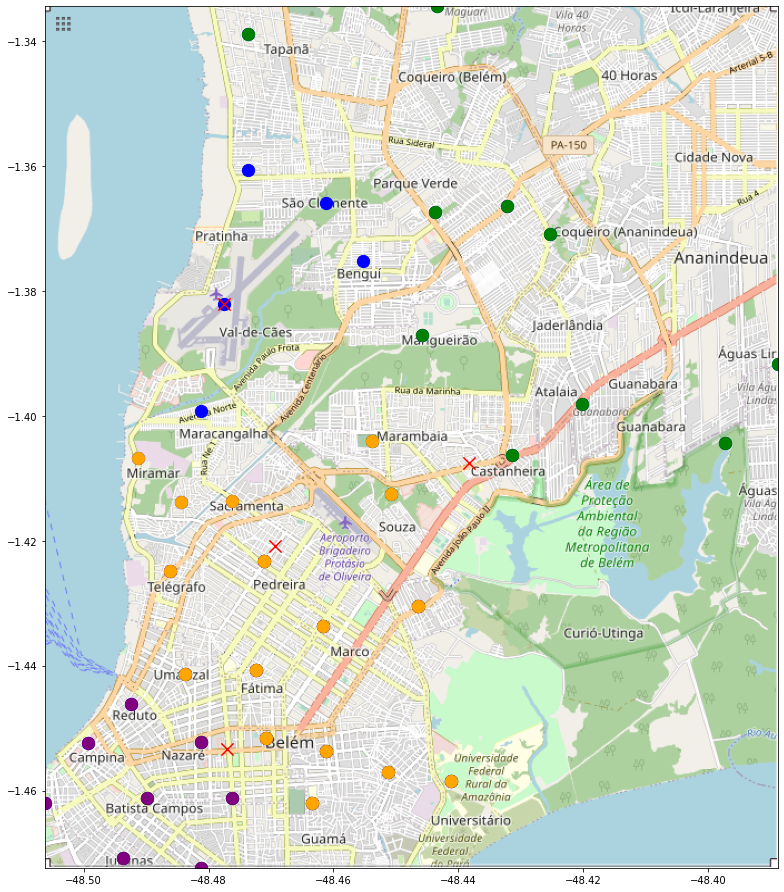

In [ ]:
# Plotagem scatter das coordenadas das amostras e centroides no mapa de belem



plt.rcParams["figure.figsize"] = [32.00, 12.50]
plt.rcParams["figure.autolayout"] = True
colors=['blue', 'green', 'purple','orange']
#  X : Longitude: Y : Latitude:
data = img
x = df.Longitude
y = df.Latitude

nTotal_amostras = df.shape[0]
ext = [np.min(x),np.max(x), np.min(y), np.max(y)]
print(ext)
aspect=img.shape[0]/float(img.shape[1])*((ext[1]-ext[0])/(ext[3]-ext[2]))

im = plt.imshow(data, extent = ext, aspect = 'equal')

#x_points = []
#y_points = []

for i in range(nTotal_amostras):    
    for classe in classes:
        if i in classes[classe]: 
          plt.scatter(df.at[i,'Longitude'], df.at[i,'Latitude'],s=150, c = colors[classe])
for i in range(len(centroids)):
    plt.scatter(centroids[i][1], centroids[i][0], marker='x', c='red', s=150)

plt.show()

[-48.5062207, -48.3888384, -1.4723764, -1.3344158441322356]


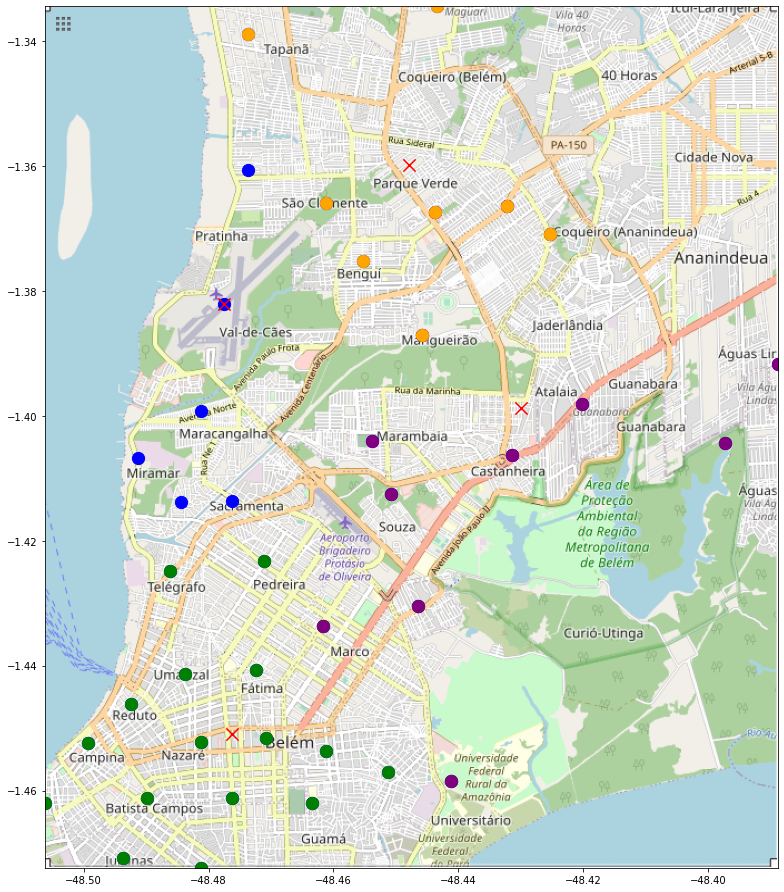

In [ ]:
# Plotagem do pior
centroids = list_centroid[worst_run]
classes = list_classes[worst_run]
# Plotagem scatter das coordenadas das amostras e centroides no mapa de belem


plt.rcParams["figure.figsize"] = [32.00, 12.50]
plt.rcParams["figure.autolayout"] = True
colors=['blue', 'green', 'purple','orange']
#  X : Longitude: Y : Latitude:
data = img
x = df.Longitude
y = df.Latitude

nTotal_amostras = df.shape[0]
ext = [np.min(x),np.max(x), np.min(y), np.max(y)]
print(ext)
aspect=img.shape[0]/float(img.shape[1])*((ext[1]-ext[0])/(ext[3]-ext[2]))

im = plt.imshow(data, extent = ext, aspect = 'equal')

#x_points = []
#y_points = []

for i in range(nTotal_amostras):    
    for classe in classes:
        if i in classes[classe]: 
          plt.scatter(df.at[i,'Longitude'], df.at[i,'Latitude'],s=150, c = colors[classe])
for i in range(len(centroids)):
    plt.scatter(centroids[i][1], centroids[i][0], marker='x', c='red', s=150)

plt.show()

In [ ]:
#h = sns.pairplot(df)

In [ ]:
df

,Latitude,Longitude
0,-1.382062,-48.477523
1,-1.404338,-48.397321
2,-1.391703,-48.388838
3,-1.413749,-48.484351
4,-1.461139,-48.489843
5,-1.375259,-48.455282
6,-1.366319,-48.432151
7,-1.452380,-48.499294
8,-1.453612,-48.461236
9,-1.406292,-48.431451
